# **SECTION I - Deep Learning Basics**

---

This notebook serves as a continuation of [Intro to Machine Learning](https://colab.research.google.com/drive/1khqmfJ5svOFKgJv3j8LBjm5GdSujDKEZ?usp=sharing). As stated in the aforementioned notebook, deep learning is a subset of machine learning. However, contrasted to traditional machine learning, deep learning tries to mimic the biological aspect of a human brain, resulting in more innovative algorithms and techniques.

<h2>§1.1 - Biological Influence</h2>
Deep learning employs many of the algorithms introduced in traditional machine learning. The difference is that deep learning is influenced by a biological model called a neural network. A neural network (NN) tries to mimic an animal's brain. Reasoning behind this:

- Intelligence is seen throughout animals (especially humans).
- Neurons make use of discrete electric signals.
- Neural networks increase a model's complexity, making it more versatile. 
- While the complexity of the model is increased, the hidden layers are abstracted away, making it easier for engineers to debug.

Nevertheless, deep learning quickly strays away from biology as computers do not require biochemistry to operate. By using biological neural networks as an inspiration, deep learning has accomplished superhuman tasks in the fields of computer vision, sound recognition, natural language processing, etc. It will certainly change how humans operate on a daily basis.

<h2>§1.2 - Neural Network Types</h2>
As expected, neural networks come in multiple types. Here are some types of neural networks:

- Artificial Neural Network
- Convolutional Neural Network
- Recurrent Neural Network
- Generative Adversarial Network

What do all of these terms mean? What is the difference between all 3 types? For one, the term "Artificial Neural Network" stands for a plain neural network with the bare minimum. As for the other types, the next few sections will explain in detail.

# **SECTION II - Artificial Neural Networks**

---

An artificial neural network (ANN) is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain (as disccused in [§1.1]):
- Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. 
- An artificial neuron receives a signal then processes it and can signal neurons connected to it. 
- The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. 
- The connections are called edges. 
- Neurons and edges typically have a weight that adjusts as learning proceeds. - The weight increases or decreases the strength of the signal at a connection. 

Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times. A diagram would help in this situation:

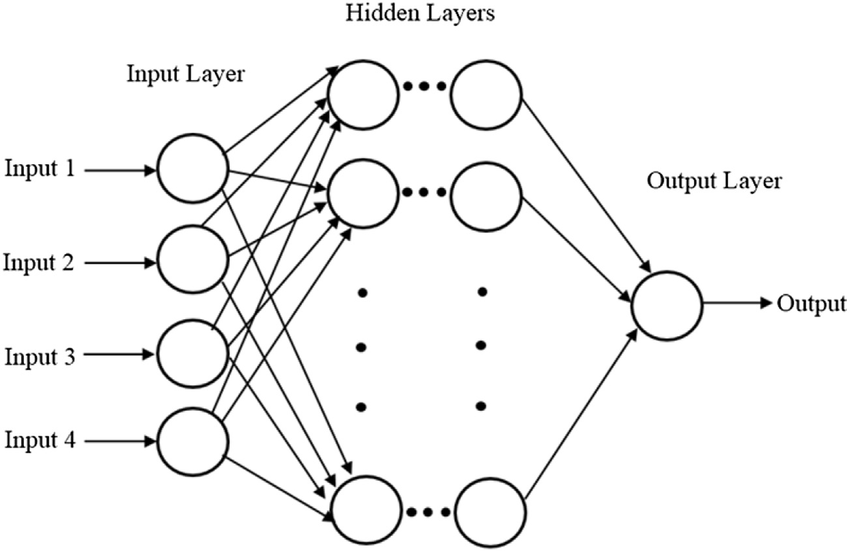

As seen in the diagram above, the typical ANN consists of:

- Input Layer
- Output Layer
- Hidden Layer(s)

The hidden layers make up the largest portion of the ANN as there can be unlimited hidden layers but only one input and output layer. Each connection between two neurons has a weight, similar to the weight in traditional ML. Larger weights result in stronger connections between two neurons. If the connections are the weights, what do the neurons actually contain? The input layer neurons hold the actual example values, but the hidden layer neurons hold a value $\hat{y}$ calculated by:

$$
\hat{y} = f(\vec{\textbf{w}} \cdot \vec{\textbf{x}} + b) \\
= f(\sum w_ix_i + b)
= f(\sum_{i=1}^{N} w_ix_i + b)
$$

where $f$ is the activation function, $b$ is the bias, $\vec{\textbf{w}}$ is the weight vector, and $\vec{\textbf{x}}$ is the example vector, and $N$ is the size of the vectors. The diagram below shows how a neuron in the following layer intakes all the values and weights of the previous layer:

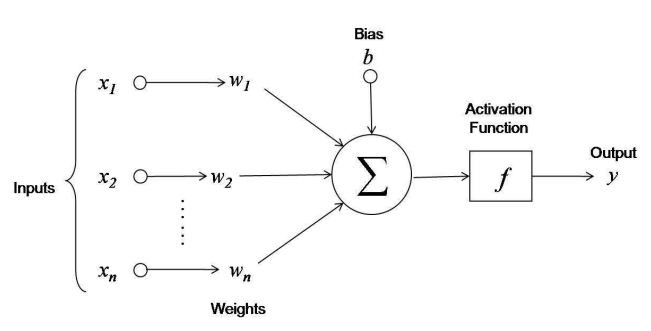

It looks like the term inside the activation function is just the equation for traditional linear regression (with dot product). So what part does the activation function $f$ play?

<h2>§2.1 - Activation Functions</h2>
The activation function of a neuron defines the output of that neuron given an input or set of inputs. Without this function, output values are meaningless. The activation function helps straighten out the output values such that the results can be feeded into the next layer. Below shows a table of common activation functions and their properties:

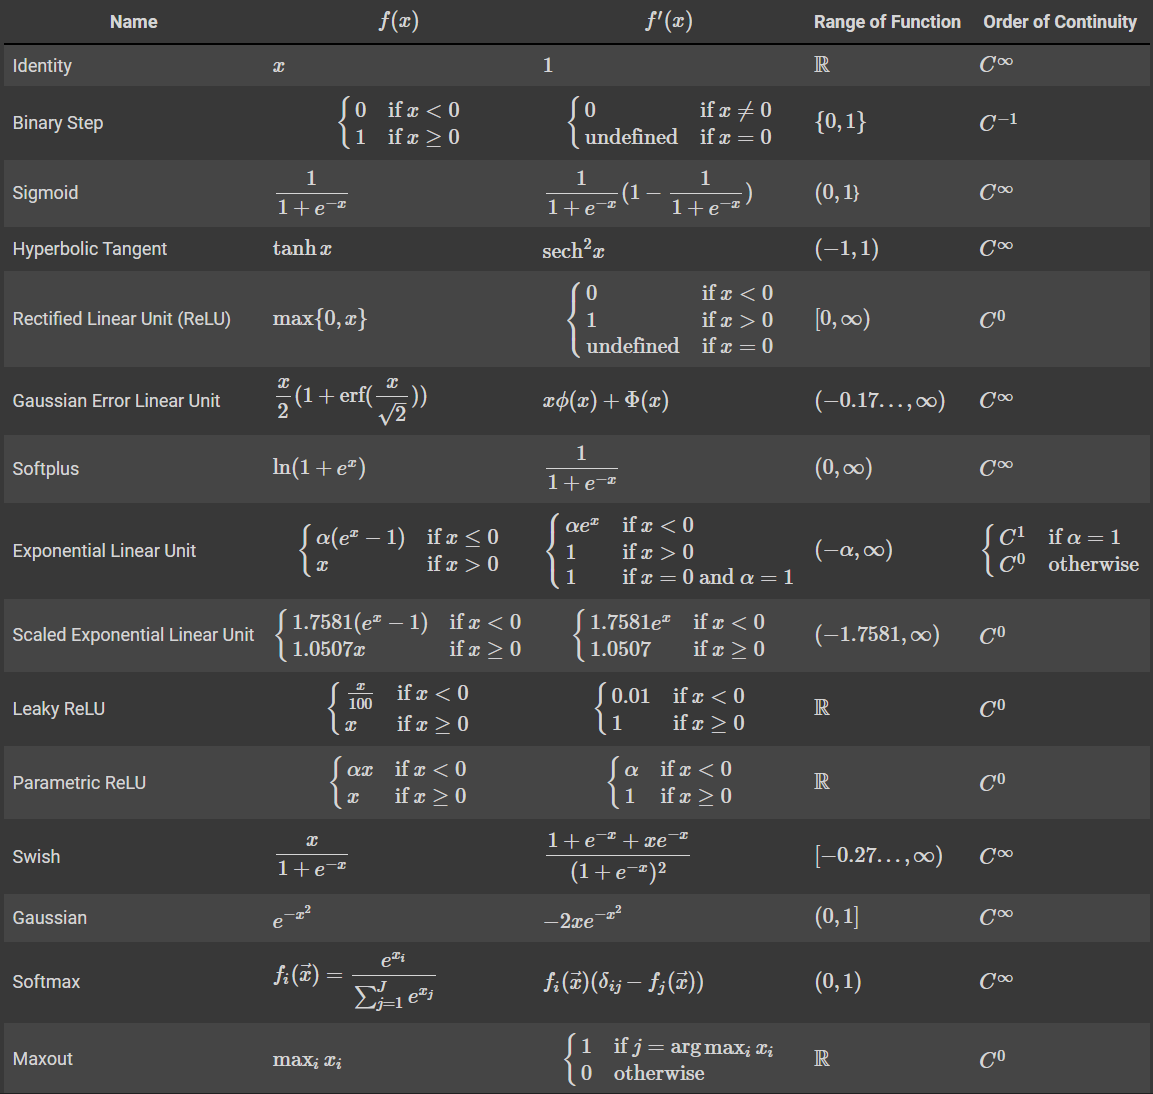

The most common activation functions will be described in more detail in the following sections. The plots of these graphs will also be shown for reference.

<h3>§2.1.1 - Sigmoid and $\text{tanh}$</h3>
These are the non-linear, non-piecewise activation functions. They are not used as much for a variety of reasons:

- **Vanishing Gradient Problem**: Just like in traditional ML, each of the neural network's weights receives an update proportional to the partial derivative of the error function with respect to the current weight in each iteration of training. The problem is that in some cases, the gradient will be vanishingly small, effectively preventing the weight from changing its value. In the worst case, this may completely stop the neural network from further training. As one example of the problem cause, traditional activation functions such as the hyperbolic tangent function have gradients in the range $(0,1]$, and backpropagation computes gradients by the chain rule. This will be discussed more in [§3.1].
- These functions are computationally expensive, as approximations involving these two functions are not as straightforward as linear functions.

The only difference between $\tanh x$  and $\sigma (x)$ is that $\tanh x$ solves the zero-centered problem:

- **Zero-Centered Problem**: The output of the activation function should be symmetrical at zero so the gradients do not shift to a particular direction.

$$\displaystyle f(x) = \tanh x$$
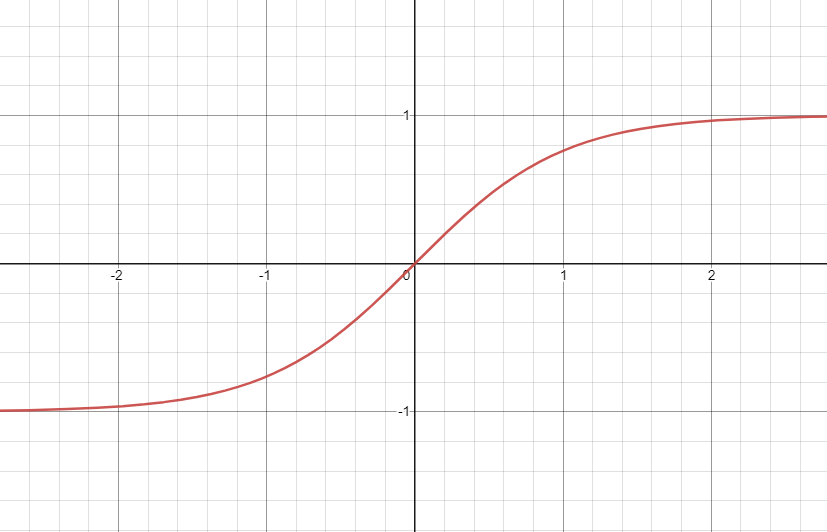

<h3>§2.1.2 - Rectified Linear Unit</h3>
This is widely used linear activation function. It is fairly efficient to compute due to its linear nature. This is a , especially with Convolutional Neural networks [§IV]. It is easy to compute and does not cause the Vanishing Gradient Problem. The only issue with $\text{ReLU}(x)$ is neurons with values less than 0 essentially "die" and not learn anything.

$$\text{ReLU}(x) = \max \{0, x\} = x\mathbf{1}_{x>0}$$
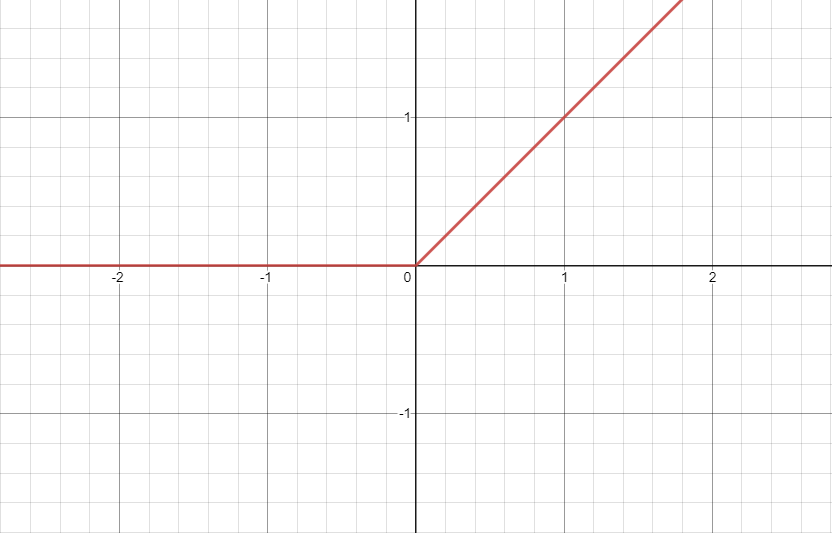


<h3>§2.1.3 - Leaky $\text{ReLU}$</h3>
This is a modified version of $\text{ReLU}(x)$ that solves the dying ReLU problem. It "leaks" if $x < 0$ before becoming a full-fledged linear function when $ x \geq 0$.

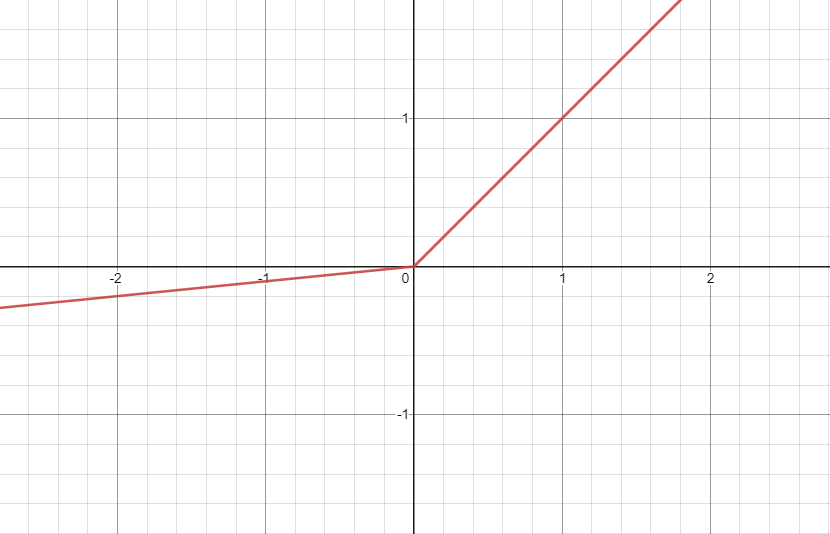

<h3>§2.1.4 - Swish</h3>
A more recent function introduced in 2017, Swish helps optimize convergence. Because Swish does not change abruptly at a point as $\text{ReLU}(0)$, this makes Swish easier to converge while training. The drawback of Swish is that it is computationally expensive due to its non-linearity.

$$f(x) = \frac{x}{1 + e^{-x}}$$
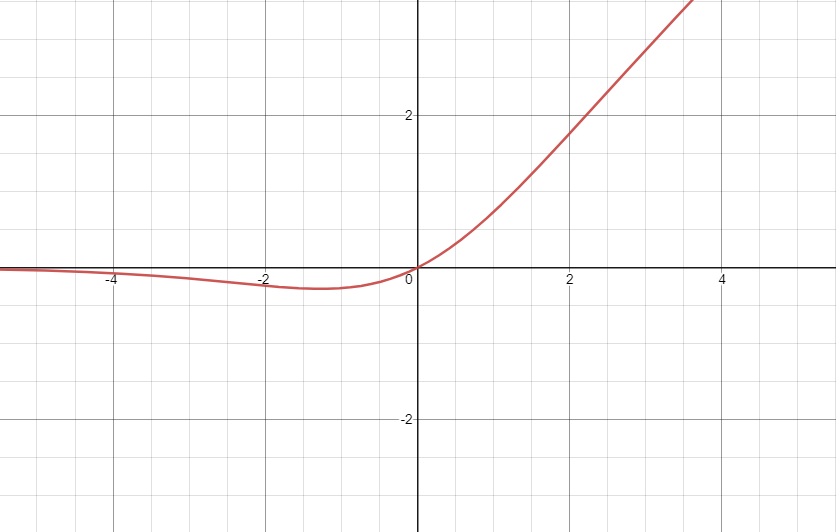

# **SECTION III - Backpropagation**

---

<h2>§3.1 - Cost Function</h2>
The cost function $J(\vec{\textbf{w}}, b)$ for an ANN is the average sum of the cross-entropy loss function (with L2 regularization):

$$ 
J(\vec{\textbf{w}}, b) = -\frac{1}{n} \bigg[\sum_{i=1}^m \sum_{k=1}^K y^{(i)}_k\ln(\phi(\vec{\textbf{w}} \cdot \vec{\textbf{x}} + b))_k (1-y^{(i)}_k)\ln(1 - \phi(\vec{\textbf{w}} \cdot \vec{\textbf{x}} + b))_k \bigg] + \frac{\lambda}{2n} \sum_{l=1}^{L-1} \sum_{k=1}^{s_l} \sum_{j=1}^{s_{l + 1}} ({\textbf{w}}_{jk}^{(l)})^2
$$

where $L$ is the number of layers, $\phi$ is the activation function, $s_l$ is the number of units in layer $l$ (not counting bias) and $K$ is the number of classes in the output layer. This cross-entropic function is also known as the logistic regression cost function for traditional ML (recall MSE is not used here due to its non-convex nature), but as neural networks are fundamentally different in how they are structured, many more factors are considered. 

<h2>§3.2 - Backwards Adjustment of Errors</h2>
Understanding how the ANN adjusts the weights from the output layer back to the input layer is why the algorithm is called "backwards" propogation and is the core essence of backpropagation. When the output is calculated, there will be a deviation between the predicted value and the actual value. Backpropogation goes back through the ANN and tweaks each weight in order to minimalize errors using gradient descent.

<h3>§3.2.1 - Chain Rule</h3>
Taking a step back to introductory calculus, the chain rule allows for the derivative of composite functions to be calculated:

$$
(f \circ g)' = (f' \circ g) g'\\
(f(g(x)))' = f'(g(x))g'(x) \\
\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}
$$

While most learned the chain rule through Lagrange's notation, knowing how the chain rule works for Leibniz's notation is especially important for backpropagation. In Leibniz's notation, the differntial $dy$ cancels out, leaving the final derivative $\frac{dz}{dx}$.

<h3>§3.2.2 - Gradient Computation</h3>
Once again, gradient descent is used for finding the minimum cost of a model. The gradient descent algorithm stays the same. However, how the gradient $ \textbf{$\nabla$} J(\vec{\textbf{w}}, b)$ is calculated is different. The partial derivative with respect to the weight of $J(\vec{\textbf{w}}, b)$ is calculated through:

$$
\frac{\partial}{\partial w_{jk}^{(l)}}J(\vec{\textbf{w}}, b) = \frac{\partial J(\vec{\textbf{w}}, b)}{\partial z^{(l)}_j} \frac{\partial z^{(l)}_j}{\partial w_{jk}^{(l)}} \\
\text{where} \,\,\, z^{(l)}_j = \sum_{k=1}^{s_{l-1}} w_{jk}^{(l)} x_k^{(l-1)} + b_j^{(l)} \\ 
\frac{\partial z^{(l)}_j}{\partial w_{jk}^{(i)}} = \frac{\partial}{\partial w_{jk}^{(l)}} \bigg[ \sum_{k=1}^{s_{l-1}} w_{jk}^{(l)} x_k^{(l-1)} + b_j^{(l)} \bigg] = x_k^{(l-1)} \\
\therefore \frac{\partial}{\partial w_{jk}^{(l)}}J(\vec{\textbf{w}}, b) = \frac{\partial J(\vec{\textbf{w}}, b)}{\partial z^{(l)}_j} x_k^{(l-1)}
$$

Similarly, the partial derivative with respect to the bias $b$ is calculated through:

$$
\frac{\partial}{\partial b_j^{(l)}}J(\vec{\textbf{w}}, b) = \frac{\partial J(\vec{\textbf{w}}, b)}{\partial z^{(l)}_j} \frac{\partial z^{(l)}_j}{\partial b_j^{(l)}} \\
\frac{\partial z^{(l)}_j}{\partial b_j^{(l)}} =  1 \\
\therefore \frac{\partial}{\partial b_j^{(l)}}J(\vec{\textbf{w}}, b)  = \frac{\partial}{\partial z^{(l)}_j}J(\vec{\textbf{w}}, b) 
$$

The common part in both equations is often called “local gradient” and is expressed as follows:

$$
\delta_j^{(l)} = \frac{\partial}{\partial z^{(l)}_j}J(\vec{\textbf{w}}, b) 
$$

Backpropagation is happening when the gradient is calculated. By using the chain rule and taking the derivative of the inner composite function in the **previous layer ($l-1$)**, backpropagation is performed.

<h3>§3.2.3 - Python Implementation</h3>
Using Python and an artificial neural network, this section shows a step-by-step guide on how to predict a simple pattern of numbers:

| Input | Output |
| ----- | ------ |
|0, 0, 1 | 0
| 1, 1, 1 | 1
|1, 1, 0| 1
|1, 0, 1 | 1
| 0, 0, 1| 0

Looking at the table, it is apparent that the output depends on the first item of the set, regardless of the other items. Consider a new scenario:

| Input | Output |
| ----- | ------ |
|1, 0, 0 | ?

It is apparent from above that the output will result in $1$. The question is, however, can a neural network predict the results accurately? To answer that, the neural network needs to be trained a specific way:

1. Take the inputs from a training set example and pass them through an activation function $\phi$ to calculate the neuron’s output.
2. Calculate the cost of the output.
3. Depending on the direction of the error, adjust the weights slightly (backpropagation).
4. Repeat this process thousands of times.

Since the output is a binary classification problem, $\phi(x) = \frac{1}{1 + e^{-x}}$. For demonstration purposes, neural network libraries such as Keras and PyTorch will not be used for this exercise. Instead, only NumPy will be used.

In [1]:
import numpy as np

Before training can start, the input vectors will need to be combined to form a $5 \times 3$ matrix.

$$
\textbf{X} = 
\begin{bmatrix}
    0 & 0 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 0 \\
    1 & 0 & 1 \\
    0 & 0 & 1
\end{bmatrix} 
$$

The output vector remains the same:

$$
\textbf{$\vec{Y}$} = 
\begin{bmatrix}
    0 \\ 1 \\ 1 \\ 1 \\ 0
\end{bmatrix} 
$$

First, define a class of methods that encompasses the neural network (with a constructor initializing random weights):

In [2]:
class NeuralNetwork():
    def __init__(self):
        np.random.seed(1)
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

The next two functions specify the activation function $\phi$:

In [3]:
def __sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

def __sigmoid_derivative(self, x):
    return self.__sigmoid(x) * (1 - self.__sigmoid(x))

Now, it is time to write the training method, which is just gradient descent:

In [4]:
def think(self, inputs):
    return self.__sigmoid(np.dot(inputs, self.synaptic_weights))

def train(self, inputs, outputs, iterations):
    for iteration in range(iterations):
        output = self.think(inputs)
        error = outputs - output
        adjustment = np.dot(inputs.T, error * self.__sigmoid_derivative(output))
        self.synaptic_weights += adjustment

Finally, time to test this neural network against the earlier scenario:

In [5]:
NeuralNetwork.__sigmoid = __sigmoid
NeuralNetwork.__sigmoid_derivative = __sigmoid_derivative
NeuralNetwork.think = think
NeuralNetwork.train = train

if __name__ == "__main__":
    neural_network = NeuralNetwork()
    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)
    training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 1, 0], [1, 0, 1], [0, 0, 1]])
    training_set_outputs = np.array([[0, 1, 1, 1, 0]]).T
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
    print("\nNew synaptic weights after training: ")
    print(neural_network.synaptic_weights)
    print("\nConsidering new situation [1, 0, 0] -> ?: ")
    print(neural_network.think(np.array([1, 0, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]

New synaptic weights after training: 
[[14.37333313]
 [ 2.77238933]
 [-7.41962778]]

Considering new situation [1, 0, 0] -> ?: 
[0.99999943]


Obviously, the neural network cannot predict with 100% accuracy. But getting a 99.999%+ accuracy shows how much deep learning has progressed over the years. Keep in mind, this basic demonstration used no specialized deep learning libraries, which is really impressive considering that computers aren't biological constructs that possess intelligence in a traditional sense.

# **SECTION IV - Convolutional Neural Networks**

---

A convolutional neural network (CNN) is a more specialized subset of ANNs. Most CNNs are commonly used in the field of computer vision. They are also known as space invariant artificial neural networks (SIANN), based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation equivariant responses known as feature maps. As discussed above, CNNs are ANNs with certain add-ons. A top-level overview of a CNN:

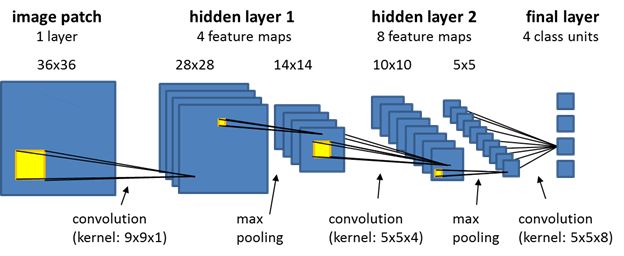

The CNN undergoes a series of convolutions in order to reach to a default ANN in the final layer. The final layer of the CNN serves as the input layer of the ANN discussed in [§II]. The default ANN will then predict the final outcome through backpropagation and error adjustment. As stated, CNNs are most useful in the field of computer imagery and vision. Why is that the case? CNNs are trained to **identify and extract the best** features from images, making them both accurate and efficient. A picture contain clusters of pixels that are important, the rest are just noise. Using convolution techniques, one can extract the useful cluster of pixels and not have to worry about for accounting clusters of random noise. The sheer size of a fully-connected neural network is also why CNNs take the lead in computer vision. A basic photo will yield several million pixels which results in billions or even trillions of neuron connections. Researchers developed techniques to throw away useless features of the image while preserving the most important ones, the fundamental concept of convolutional neural networks. But how does the CNN know which features are useful or not? For that, kernels and filters come into play.

<h2>§4.1 - Convolution Layer</h2>
As seen in the diagram above, CNNs have multiple layers of processing before reaching a regular ANN. The first of many layers, the convolution layer, uses filter kernels to scan the image whilst looking for important features. The general form of a convolution function is:

$$
\mathcal{C}(x, y) = \sum_{dx=-a}^a \sum_{dy=-b}^b \omega(dx, dy)f(x+dx, y + dy)
$$

where $\mathcal{C}(x, y)$ is the filtered image, $f(x, y)$ is the original image, and $\omega$ is the filter kernel matrix. Every element of the filter kernel is considered by ${\displaystyle -a\leq dx\leq a}$ and ${\displaystyle -b\leq dy\leq b}$. The table below shows common filter kernels:

| Operation | Filter Kernel $\omega$
| - | -
| Identity | \begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0\end{bmatrix}
| Ridge Detection | \begin{bmatrix} -1 & -1 & -1 \\ -1 & 8 & -1 \\ -1 & -1 & -1 \end{bmatrix} 
| Sharpen | \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0\end{bmatrix}
| Box Blur | $\frac{1}{9} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1\end{bmatrix} $
| Gaussian Blur | $\frac{1}{256} \begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & 36 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4\\ 1 & 4 & 6 & 4 & 1 \end{bmatrix} $
| Unsharp Masking | $-\frac{1}{256} \begin{bmatrix} 1 & 4 & 6 & 4 & 1 \\ 4 & 16 & 24 & 16 & 4 \\ 6 & 24 & -476 & 24 & 6 \\ 4 & 16 & 24 & 16 & 4\\ 1 & 4 & 6 & 4 & 1 \end{bmatrix} $

The general form for matrix convolution is (not limited to CNNs):

$$
\sum_{i=0}^{m-1} \sum_{j=0}^{n-1} \textbf{X}_{(m-i)(n-j)} \textbf{Y}_{(i+1)(j+1)}
$$

where $\textbf{X}$ and $\textbf{Y}$ are matrices with size $m \times n$. Below shows an animated example of the convolution layer.

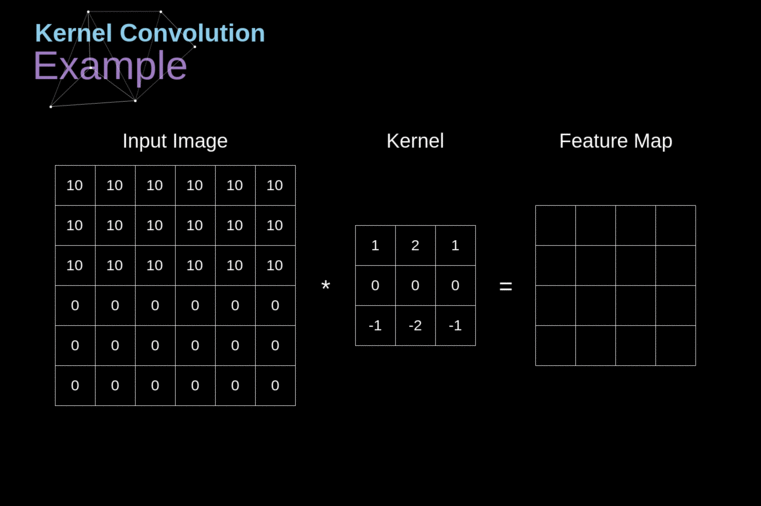


$\mathcal{C}(x, y)$ is also called a **feature map**. The feature map contains a map of the important features picked out through convolution. Before the feature map can go off to pooling, it must undergo non-linearity in order to acheive a versatile range of predictions rather than strict linear predictions. Usually an activation function is applied here.

<h3>§4.1.1 - Padding</h3>
Convolution is great for shrinking down a matrix into its important features. However, it is weak around the edges and corners. To combat this, padding is added around the input matrix and its width $p_w$ is found using this formula:

$$
p_w = \frac{\omega_n - 1}{2}
$$

where $\omega_n$ is the dimension of the filter kernel. 

<h2>§4.2 - Pooling Layer and Stride</h2>
The next layer in a CNN is the pooling layer. An important concept to know beforehand is called striding. This technique shifts the filter kernel by some stride size $s$, which is best demonstrated below:

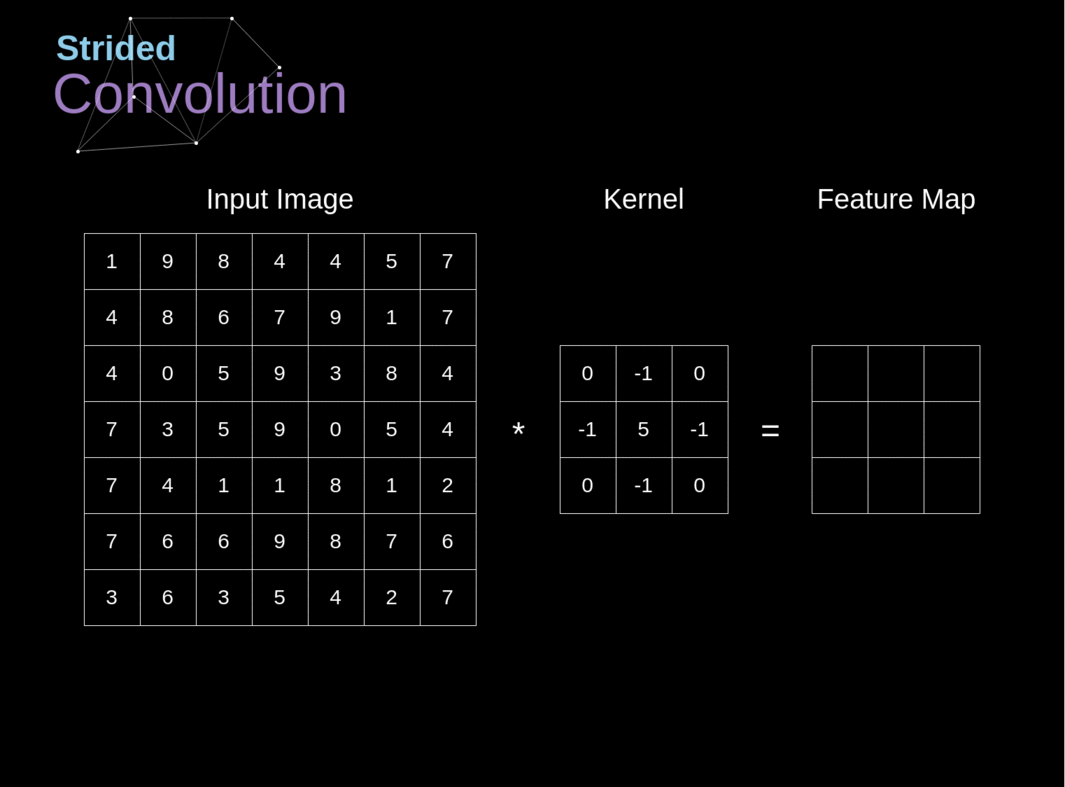

This brings the dimensions of the resulting feature map to be:

$$
n_f = ⌊ \frac{n_i + 2p_w - \omega_n}{s} + 1 ⌋
$$

where $n_i$ is the dimension of the input. The pooling layer is very simple: 

1. Pick a window size and scan it across the feature map. (kind of like the convolution layer).
2. Within the "window" either: take the average of all the values in the window (**average pooling**) or take the max value inside the "window" (**max pooling**).
3. Repeat until dimensions of the feature map are desired.

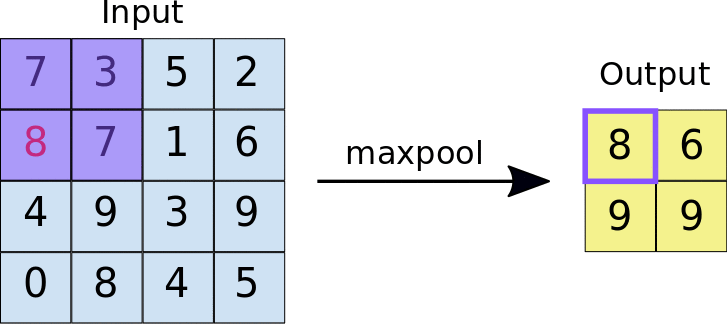

After pooling layer is applied several times, the final feature map should be within reasonable size such that a regular ANN can consume it.

<h2>§4.3 - CIFAR Classification Demo</h2>
In a practical use case of CNNs, this section will classify CIFAR-10 images.he CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. It is not recommended to write the convolutional and pooling layers from scratch. Instead, built-in methods from TensorFlow and Keras will be used:

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

It is time to download the CIFAR dataset. To verify the quality of the data, the first 25 images will be plotted:

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

The 6 lines of code below define the convolutional base using a common pattern: a stack of `Conv2D` and `MaxPooling2D` layers. As input, a CNN takes tensors of shape `(image_height, image_width, color_channels)`, ignoring the batch size.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Above, the output of every `Conv2D` and `MaxPooling2D` layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink deeper in the network. The number of output channels for each `Conv2D` layer is controlled by the first argument (e.g., 32 or 64).
To complete the model, the last output tensor from the convolutional base (of shape (4, 4, 64)) will be fed into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, flatten (or unroll) the 3D output to 1D, then add one or more dense layers on top. CIFAR has 10 output classes, so use a final dense layer with 10 outputs:

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

The network summary shows that (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two dense layers. Now, it is time to train the model:

In [ ]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = model.fit(train_images, 
                    train_labels, 
                    epochs=10, 
                    validation_data=(test_images, test_labels))

After ten epochs, the model finishes with a 70%+ accuracy in classifing the CIFAR dataset. Visualizing the model accuracy:


In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

The trend in the graph above shows that the accuracy of the model approaches an asymptote after a certain amount of epochs. There is a minor detail is worth noting, when compiling the model, there is a optimizer for gradient descent that needs to be discussed: the **ADAM** optimizer.

<h3>§4.3.1 - Adaptive Moment Estimation Optimizer</h3>

The Adaptive Moment Estimation (ADAM) Optimizer is an algorithm for optimizing gradient descent. The method is really efficient when working with problems involving a lot of data or parameters. Intuitively, it is a combination of gradient descent with momentum and the Root Mean Square Propagation algorithm. This algorithm is used to accelerate the gradient descent algorithm by taking into consideration the ‘exponentially weighted average’ of the gradients. Using averages makes the algorithm converge towards the minima at a faster pace. Below are the equations that describe this optimization:

$$
m_i = \beta_1 m_{i-1} + (1-\beta_1) \frac{\partial}{\partial w_i}\mathcal{J}(\vec{\textbf{w}}, b) \\
v_i = \beta_2 v_{i-1} + (1-\beta_2) \bigg(\frac{\partial}{\partial w_i} \mathcal{J}(\vec{\textbf{w}}, b)\bigg)^2 \\
w_{i+1} = w_i- \frac{\alpha_t}{\sqrt{v_i + ϵ}} \frac{\partial \mathcal{J}(\vec{\textbf{w}}, b)}{\partial w_i}  \,\, \text{ OR } \,\, w_{i+1} = w_i - \alpha m_i \\
\therefore \hat{m_i} = \frac{m_i}{1 - \beta_1^{[i]}} \,\, \text{ AND } \,\, \hat{v_i} = \frac{v_i}{1 - \beta_2^{[i]}}\\
\implies w_{i+1} = w_i - \hat{m_i} \bigg( \frac{\alpha}{ϵ + \sqrt{\hat{v_i}}}\bigg)
$$

where $\beta_1$ and $\beta_2$ are the decay rates of the gradients, $\alpha$ is the learning rate, $ϵ$ is an infinitesimal, $m_i$ is the aggregate of gradients on iteration $i$, $v_i$ is the sum of squares of past gradients up to iteration $i$. Remember, ADAM is a optimization techinque for gradient descent, so many properties such as tuning learning rates and gradient computation stays the same for both ADAM and default gradient descent.

# **SECTION V - Recurrent Neural Networks**

---

Recurrent neural networks, also known as RNNs, are a class of neural networks that allow previous outputs to be used as inputs while having hidden states. They are typically as follows:

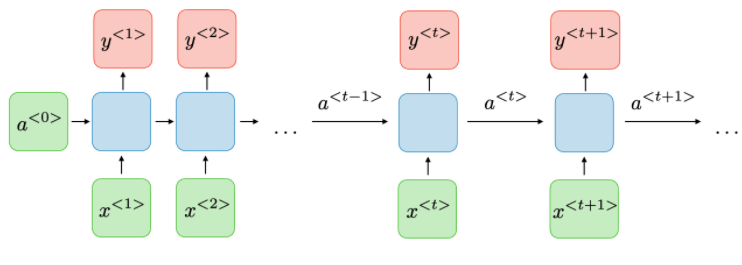

For each timestep $t$, the activation $a^{< t >}$ and the output $y^{< t >}$ are expressed as follows:

$$
a^{<t>} = g_1(W_{aa}a^{<t-1>} W_{ax}x^{<t>} + b_a) \\
y^{<t>} = g_2(W_{ya}a^{<t>} + b_y)
$$

where $W_{ax}, W_{aa}, W_{ya}, b_a, b_y$ are coefficients that are shared temporally and $g_1, g_2$ activation functions.

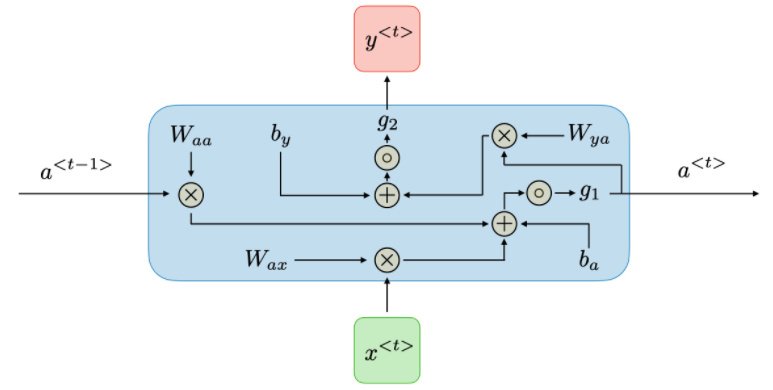

As with the other types of neural networks, RNNs have certain advantanges:

- Possibility of processing input of any length.
- Model size not increasing with size of input.
- Computation takes into account historical information.
- Weights are shared across time.

and certain drawbacks as well:

- Computation being slow
- Difficulty of accessing information from a long time ago
- Cannot consider any future input for the current state

RNN models are mostly used in the fields of natural language processing and speech recognition. The different applications are summed up in the table below:

Type of RNN &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | Illustration | Example
--- | --- | --- 
$T_x = T_y = 1$ | 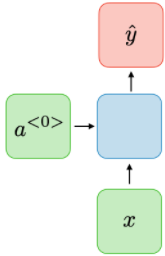 | Traditional Neural Network
$T_x = 1, T_y > 1$ | 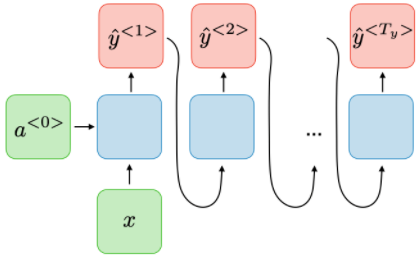 | Music Generation
$T_x > 1, T_y = 1$ | 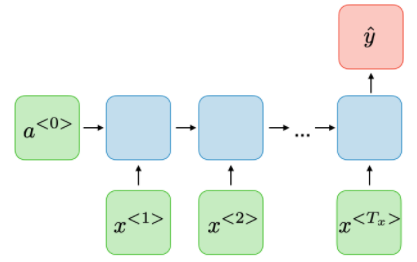 | Sentiment Classification
$T_x = T_y$ | 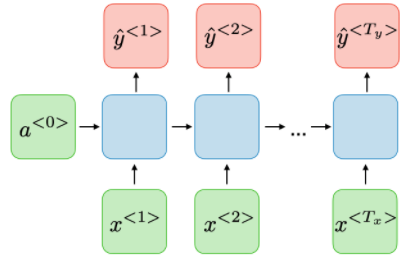 | Name Entity Recognition
$T_x \neq T_y$ | 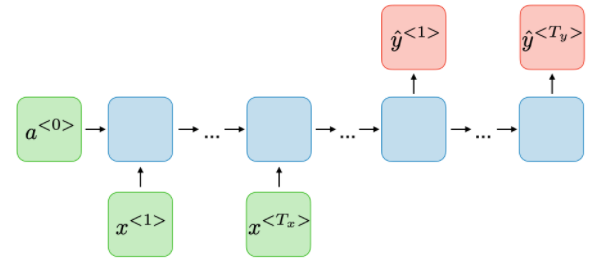 | Machine Translation

In the case of a recurrent neural network, the loss function $\mathcal{L}$ of all time steps is defined based on the loss at every time step as follows:

$$
\mathcal{L}(\hat{y}, y) = \sum_{t=1}^{T_y} \mathcal{L}(\hat{y}^{<t>}, y^{<t>})
$$

Backpropagation is done at each point in time. At timestep $T$, the derivative of the loss $\mathcal{L}$ with respect to weight matrix $W$ is expressed as follows:

$$
\frac{\partial \mathcal{L}^{(T)}}{\partial W} = \sum_{t=1}^T \frac{\partial \mathcal{L}^{(T)}}{\partial W} \bigg|_{(t)}
$$

Gated Recurrent Unit (GRU) and Long Short-Term Memory units (LSTM) deal with the vanishing gradient problem encountered by traditional RNNs, with LSTM being a generalization of GRU. Below is a table summing up the characterizing equations of each architecture:

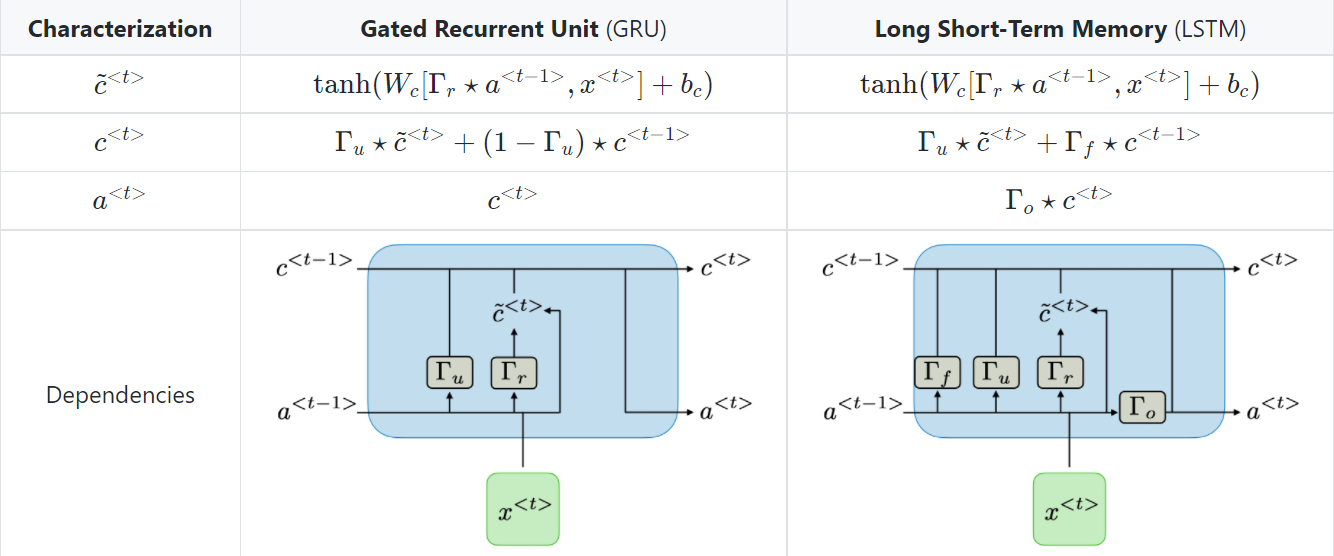

The table below sums up the other commonly used RNN architectures:

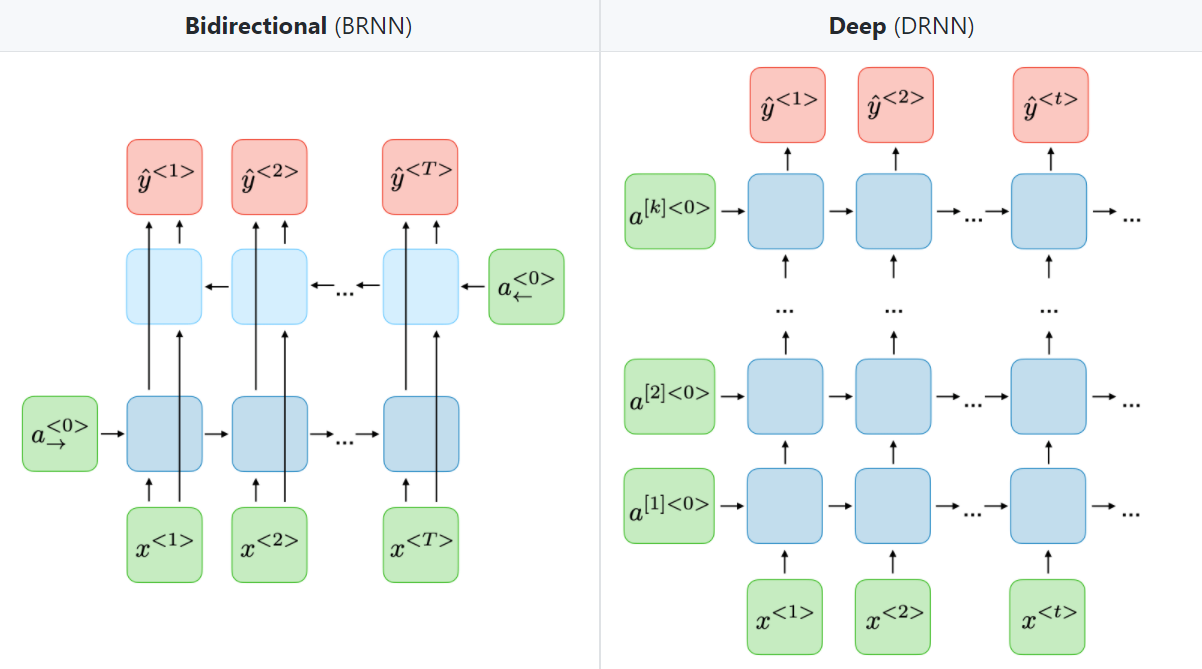

<h2>§5.1 - Learning Word Representation</h2>

For a given word $w$, the embedding matrix $E$ is a matrix that maps its 1-hot representation $o_w$ to its embedding $e_w$ as follows:

$$
e_w = Eo_w
$$

Word2vec is a framework aimed at learning word embeddings by estimating the likelihood that a given word is surrounded by other words. Popular models include skip-gram, negative sampling and CBOW.

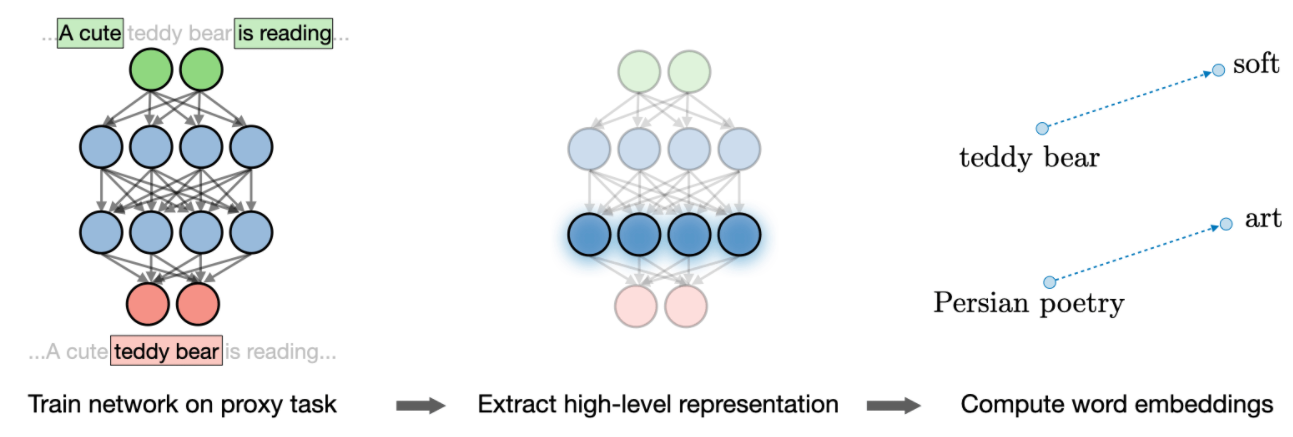

The skip-gram word2vec model is a supervised learning task that learns word embeddings by assessing the likelihood of any given target word $t$ happening with a context word $c$. By noting $\theta_t$ a parameter associated with $t$, the probability $P(t | c)$ is given by:

$$
\displaystyle P(t|c) = \frac{e^{\theta_t^Te_c}}{\sum_{j=1}^{|V|}e^{\theta_j^Te_c}}
$$

where $|V|$ is the size of vocabulary list. The GloVe model, short for global vectors for word representation, is a word embedding technique that uses a co-occurence matrix $X$ where each $X_{i,j}$ denotes the number of times that a target $i$ occurred with a context $j$. Its cost function $J$ is as follows:

$$
J(\theta) = \frac{1}{2} \sum_{i,j=1}^{|V|} f(X_{i,j})(\theta_i^Te_j + b_i + b'_j - \ln(X_{i,j}))^2
$$

where $f$ is a weighting function such that $X_{i,j}=0\Longrightarrow f(X_{i,j})=0$. The cosine similarity between words $w_1$ and $w_2$ is expressed as follows:

$$
\cos \theta = \frac{w_1 \cdot w_2}{||w_1|| ||w_2||}
$$

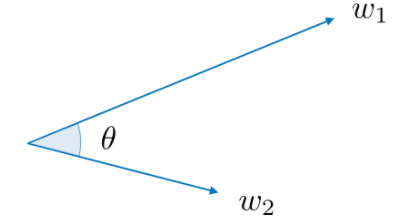

t-SNE ($t$-distributed Stochastic Neighbor Embedding) is a technique aimed at reducing high-dimensional embeddings into a lower dimensional space. In practice, it is commonly used to visualize word vectors in the 2D space.
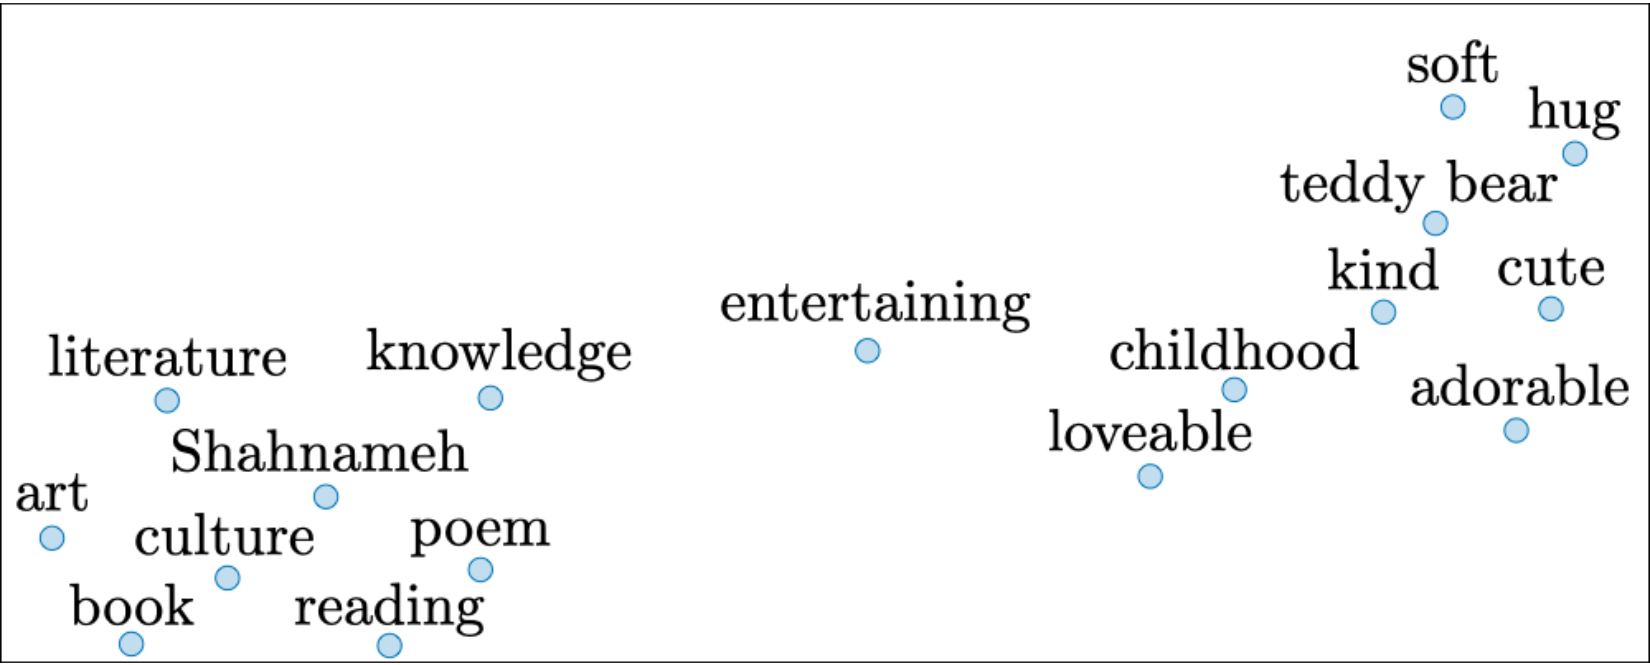

# **SECTION VI - Generative Adversarial Networks**

---

Generative adversarial networks (GANs) are algorithmic architectures that use two neural networks, pitting one against the other (thus “adversarial”) in order to generate new, synthetic instances of data that can pass for real data. They are used widely in image generation, deepfakes, video generation and voice generation. One neural network, called the generator, generates new data instances, while the other, the discriminator, evaluates them for authenticity; i.e. the discriminator decides whether each instance of data that it reviews belongs to the actual training dataset or not. For MNIST, the discriminator network is a standard convolutional network that can categorize the images fed to it, a binomial classifier labeling images as real or fake. The generator is an inverse convolutional network, in a sense: While a standard convolutional classifier takes an image and downsamples it to produce a probability, the generator takes a vector of random noise and upsamples it to an image. The first throws away data through downsampling techniques like maxpooling, and the second generates new data. Both nets are trying to optimize a different and opposing objective function, or loss function, in a zero-zum game. This is essentially an actor-critic model. As the discriminator changes its behavior, so does the generator, and vice versa. Their losses push against each other.

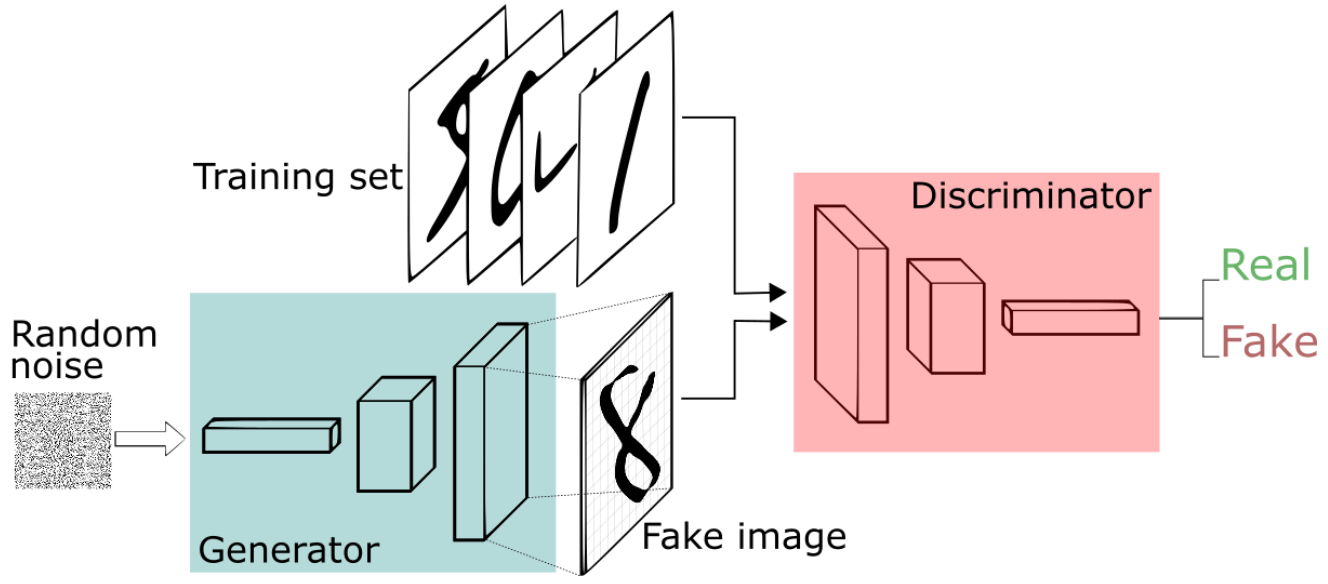

<h2>§6.1 - Python Implementation</h2>

Below is an example of a GAN written in Python Keras. Comments are provided along the way for clarity.

In [ ]:
from __future__ import print_function, division
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np

class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100
        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()
        
        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        self.discriminator.trainable = False
        
        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        self.combined = Model(z, validity)
        # Trains the generator to fool the discriminator
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    def build_generator(self):
        model = Sequential()
        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        return Model(noise, img)

    def build_discriminator(self):
        model = Sequential()
        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):
        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):
            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        plt.close()


if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=5000, batch_size=32, sample_interval=200)

That just about wraps up the topics one needs to know to get started in deep learning. Many fields in deep learning have not been explored yet, so this notebook really lives up to its name as an introduction to deep learning. With the knowledge described in this notebook, one should now have a comfortable understanding of deep learning and the mathematics behind it.